In [1]:
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [2]:
num_classes = 10
im_rows = 32
im_cols = 32
im_size = im_rows * im_cols * 3

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.reshape(-1, im_size).astype('float32') / 255
X_test = X_test.reshape(-1, im_size).astype('float32') / 255

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [4]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(im_size,)))
model.add(Dense(num_classes, activation='softmax'))

In [5]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

hist = model.fit(X_train, y_train,
    batch_size=32, epochs=50,
    verbose=1,
    validation_data=(X_test, y_test))

Epoch 1/50
1563/1563 [==============================] - 18s 11ms/step - loss: 2.0478 - accuracy: 0.2913 - val_loss: 1.7607 - val_accuracy: 0.3769
Epoch 2/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.7183 - accuracy: 0.3875 - val_loss: 1.6468 - val_accuracy: 0.4088
Epoch 3/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6448 - accuracy: 0.4151 - val_loss: 1.6206 - val_accuracy: 0.4217
Epoch 4/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.6013 - accuracy: 0.4336 - val_loss: 1.5822 - val_accuracy: 0.4394
Epoch 5/50
1563/1563 [==============================] - 15s 9ms/step - loss: 1.5764 - accuracy: 0.4409 - val_loss: 1.5535 - val_accuracy: 0.4475
Epoch 6/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5365 - accuracy: 0.4560 - val_loss: 1.5520 - val_accuracy: 0.4417
Epoch 7/50
1563/1563 [==============================] - 13s 9ms/step - loss: 1.5222 - accuracy: 0.4575 - val_loss: 1.5159 - val_a

In [6]:
score = model.evaluate(X_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

313/313 [==============================] - 1s 4ms/step - loss: 1.5089 - accuracy: 0.4763
正解率= 0.4763000011444092 loss= 1.5089452266693115


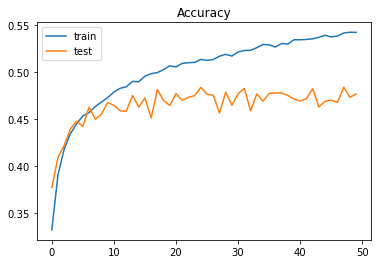

In [7]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

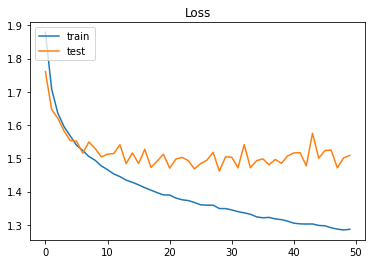

In [8]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()